# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities)

Number of cities in the list: 585
['jayapura', 'port-aux-francais', 'hamilton', 'porto novo', 'dzilam gonzalez', 'nikolayevsk-on-amure', 'obo', 'mollendo', 'two rivers', 'bilibino', 'qaqortoq', 'sault ste. marie', 'ilulissat', 'waitangi', 'susuman', 'edinburgh of the seven seas', 'santarem', 'verkhnevilyuysk', 'borskoye', 'ushuaia', 'cabo san lucas', 'san-pedro', 'yanam', 'adamstown', 'west island', 'grytviken', 'la ronge', 'fort mcmurray', 'holualoa', 'lihue', 'arawa', 'qui nhon', 'albany', 'kodiak', 'labrador city', 'mount pearl', 'ribeira grande', 'bethel', 'port mathurin', 'chibougamau', 'olonkinbyen', 'shakhtersk', 'sur', 'taiohae', 'chemolgan', 'eyl', 'mitu', 'lorengau', 'hawaiian paradise park', 'tazovsky', 'kenai', 'whitehorse', 'iqaluit', 'blackmans bay', 'stanley', 'kingston', 'hermanus', 'cargados carajos', 'ancud', 'st anne', 'aasiaat', 'huarmey', 'vadso', 'devinuwara', 'toga village', 'colonia', 'tadjourah', 'tiksi', 'nova sintra', 'kawthoung', 'papatowai', 'arteche', 'eas

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jayapura
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | dzilam gonzalez
Processing Record 6 of Set 1 | nikolayevsk-on-amure
Processing Record 7 of Set 1 | obo
Processing Record 8 of Set 1 | mollendo
Processing Record 9 of Set 1 | two rivers
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | sault ste. marie
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | santarem
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | borskoye
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 o

In [ ]:
pprint(city_weather)

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jayapura,-2.5333,140.7000,32.66,69,24,3.20,ID,1727503487
1,port-aux-francais,-49.3500,70.2167,2.11,70,42,13.06,TF,1727503488
2,hamilton,39.1834,-84.5333,20.56,86,100,5.14,US,1727503489
3,porto novo,6.4965,2.6036,24.02,93,88,1.75,BJ,1727503490
4,dzilam gonzalez,21.2833,-88.9333,24.49,88,89,1.13,MX,1727503492


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jayapura,-2.5333,140.7000,32.66,69,24,3.20,ID,1727503487
1,port-aux-francais,-49.3500,70.2167,2.11,70,42,13.06,TF,1727503488
2,hamilton,39.1834,-84.5333,20.56,86,100,5.14,US,1727503489
3,porto novo,6.4965,2.6036,24.02,93,88,1.75,BJ,1727503490
4,dzilam gonzalez,21.2833,-88.9333,24.49,88,89,1.13,MX,1727503492


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

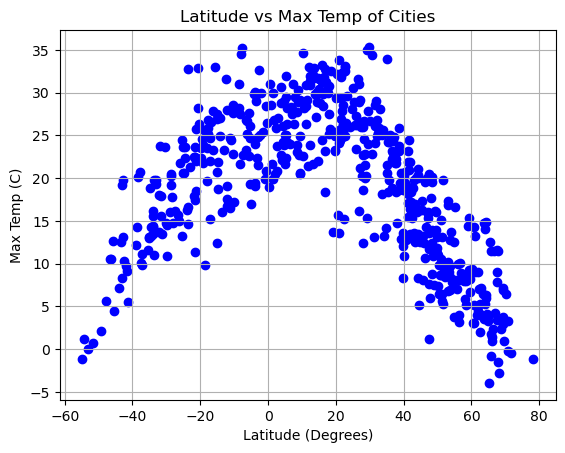

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x,y, marker="o", color="b")

# Incorporate the other graph properties
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Max Temp (C)")
plt.grid(True)
plt.title("Latitude vs Max Temp of Cities")




# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

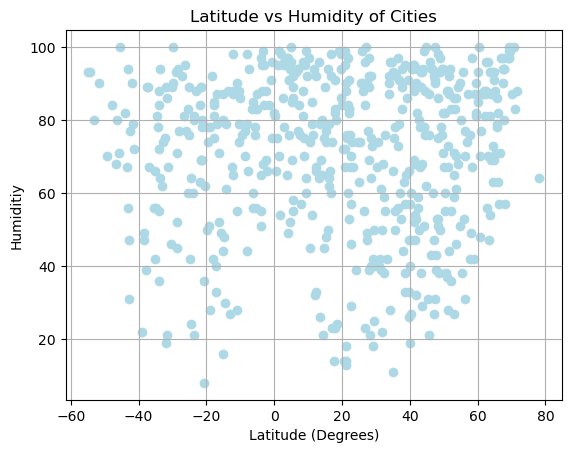

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x,y, marker="o", color="lightblue")

# Incorporate the other graph properties
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humiditiy")
plt.grid(True)
plt.title("Latitude vs Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

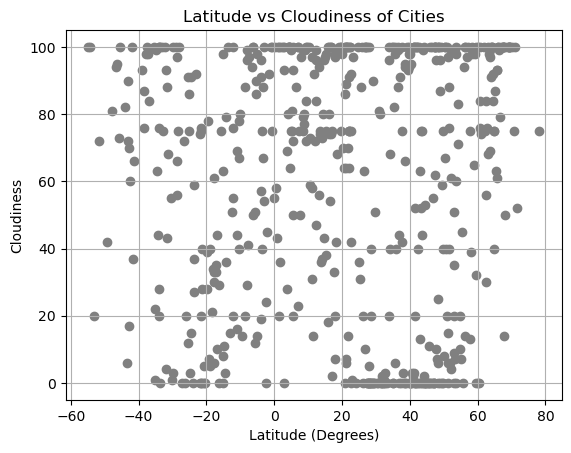

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x,y, marker="o", color="grey")
# Incorporate the other graph properties
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.title("Latitude vs Cloudiness of Cities")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

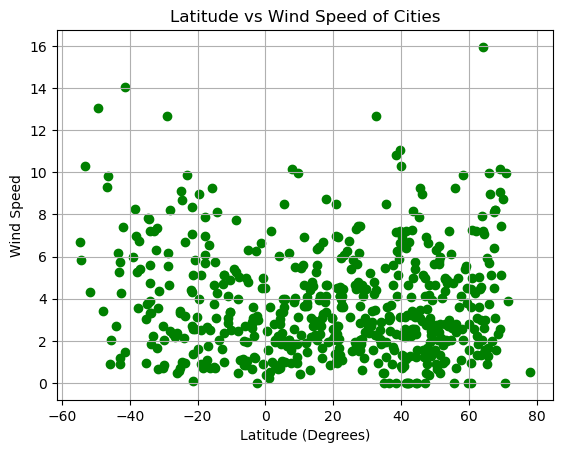

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x,y, marker="o", color="green")

# Incorporate the other graph properties
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.title("Latitude vs Wind Speed of Cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreg_plot (x,y,title,y_label, eq_loc):
    slope, int, r, p, std_err = stats.linregress(x,y)
    regress = x * slope + int
    regress_line = "y = " + str(round(slope,2)) + " x + " + str(round(int,2))

    plt.scatter(x,y)
    plt.plot(x, regress, "r-")
    plt.xlabel("Latitude")
    plt.annotate(regress_line,eq_loc,fontsize=15,color="red")
    plt.ylabel(f"{y_label}")
    plt.title(f"{title}")
    print(f"The r-squared is: {r**2}, and the r-value is: {r}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hamilton,39.1834,-84.5333,20.56,86,100,5.14,US,1727503489
3,porto novo,6.4965,2.6036,24.02,93,88,1.75,BJ,1727503490
4,dzilam gonzalez,21.2833,-88.9333,24.49,88,89,1.13,MX,1727503492
5,nikolayevsk-on-amure,53.1406,140.7300,16.88,59,35,2.81,RU,1727503493
6,obo,5.3998,26.4869,22.36,86,93,1.99,CF,1727503494


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jayapura,-2.5333,140.7000,32.66,69,24,3.20,ID,1727503487
1,port-aux-francais,-49.3500,70.2167,2.11,70,42,13.06,TF,1727503488
7,mollendo,-17.0231,-72.0147,15.28,87,44,1.73,PE,1727503495
13,waitangi,-43.9535,-176.5597,7.12,82,82,2.68,NZ,1727503503
15,edinburgh of the seven seas,-37.0676,-12.3116,9.81,67,84,5.42,SH,1727503505


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7056176301752715, and the r-value is: -0.8400104940863962


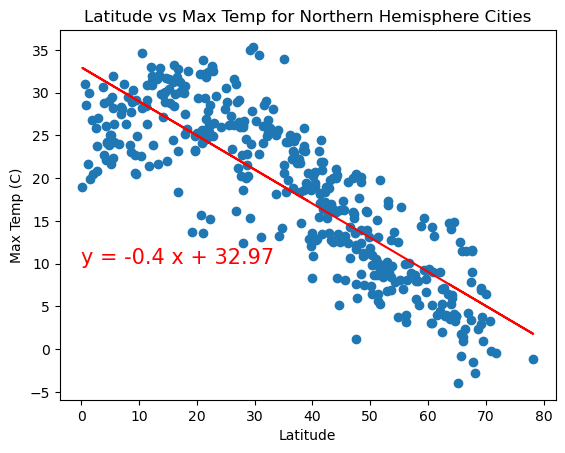

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"] 
y_label = "Max Temp (C)"
title = "Latitude vs Max Temp for Northern Hemisphere Cities"
eq_loc=(0,10)
linreg_plot(x,y,title,y_label, eq_loc)


The r-squared is: 0.5813495690155168, and the r-value is: 0.7624628312354097


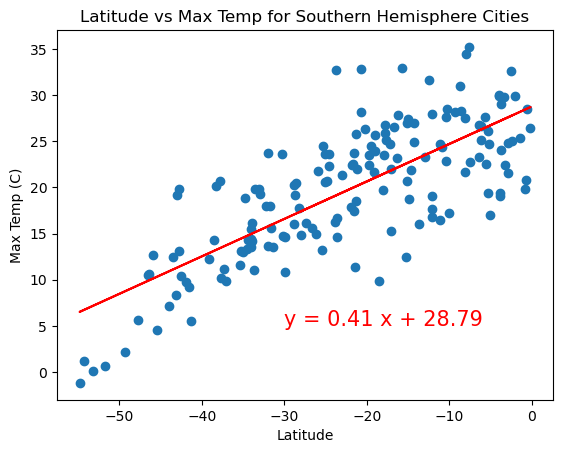

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"] 
y_label = "Max Temp (C)"
title = "Latitude vs Max Temp for Southern Hemisphere Cities"
eq_loc=(-30,5)
linreg_plot(x,y,title,y_label, eq_loc)

**Discussion about the linear relationship:** There is a correlation between temperatures and latitude, where the closer to latitude 0 degrees the higher the temperature. This manifests as a positive relationship in the southern hemisphere, and a negative relationship in the northern hemisphere. This r value suggests this correlation is strong.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0023578609781276594, and the r-value is: 0.04855781068095698


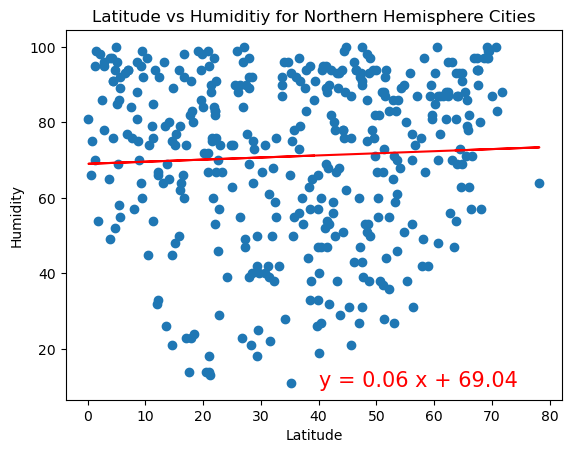

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"] 
y_label = "Humidity"
title = "Latitude vs Humiditiy for Northern Hemisphere Cities"
eq_loc=(40,10)
linreg_plot(x,y,title,y_label, eq_loc)

The r-squared is: 0.0035731630943392914, and the r-value is: 0.059775940764987476


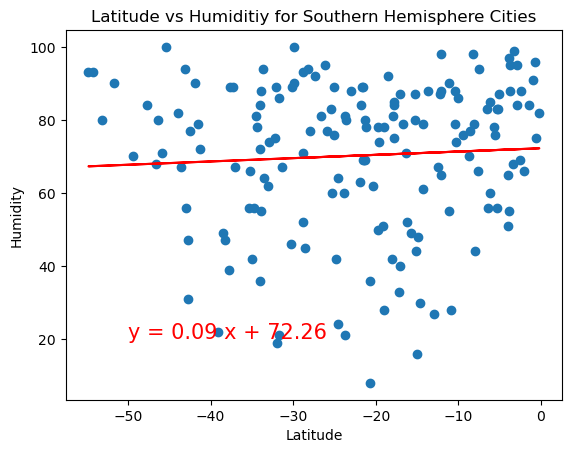

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"] 
y_label = "Humidity"
title = "Latitude vs Humiditiy for Southern Hemisphere Cities"
eq_loc=(-50,20)
linreg_plot(x,y,title,y_label, eq_loc)

**Discussion about the linear relationship:** Humidity appears to have no correlation with latitude for the cities reviewed. The correlation co-efficient is close to 0 and the r-value suggests no relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0007757001318962664, and the r-value is: -0.027851393715508502


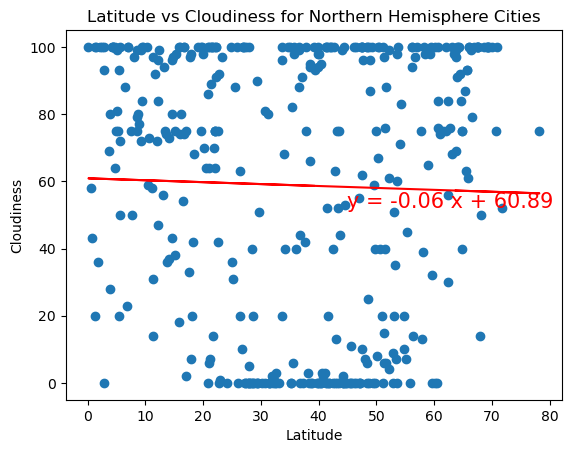

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"] 
y_label = "Cloudiness"
title = "Latitude vs Cloudiness for Northern Hemisphere Cities"
eq_loc=(45,52)
linreg_plot(x,y,title,y_label, eq_loc)

The r-squared is: 0.012084711742270644, and the r-value is: -0.10993048595485533


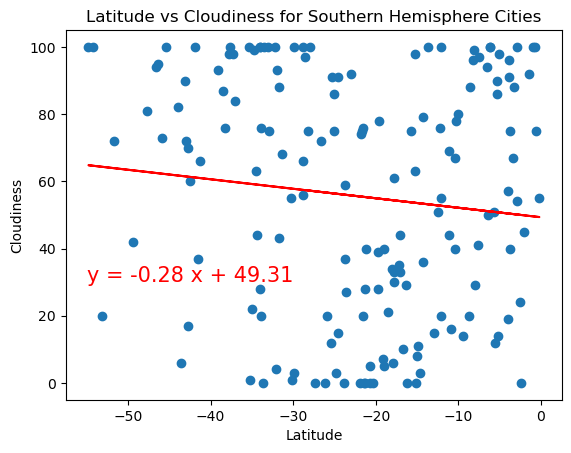

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"] 
y_label = "Cloudiness"
title = "Latitude vs Cloudiness for Southern Hemisphere Cities"
eq_loc=(-55,30)
linreg_plot(x,y,title,y_label, eq_loc)

**Discussion about the linear relationship:** On visual inspection, there appears to be no correlation between Latitude and Cloudiness, however, there appears to be a very weak correlation between latitude and cloudiness when linear regression is performed. The correlation co-efficient for both the northern and southern hemispheres suggests there may be marginally less cloud as they trend towards a latitude of 0. The r-value suggests this correlation is extremely weak, or no correlation is present. This could potentially be caused by the cloud patterns on the day of weather sampling, or by season at the current time point. Further sampling would need to be performed again to revalidate this result on a different day/month.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.018344384743482475, and the r-value is: 0.13544144396558416


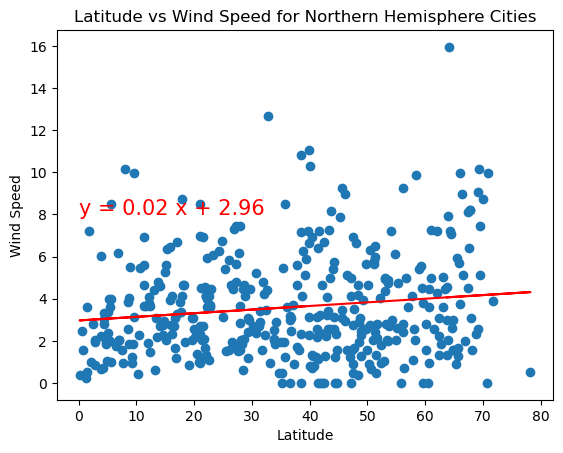

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"] 
y_label = "Wind Speed"
title = "Latitude vs Wind Speed for Northern Hemisphere Cities"
eq_loc=(0,8)
linreg_plot(x,y,title,y_label, eq_loc)

The r-squared is: 0.09036085667733869, and the r-value is: -0.3006008261421427


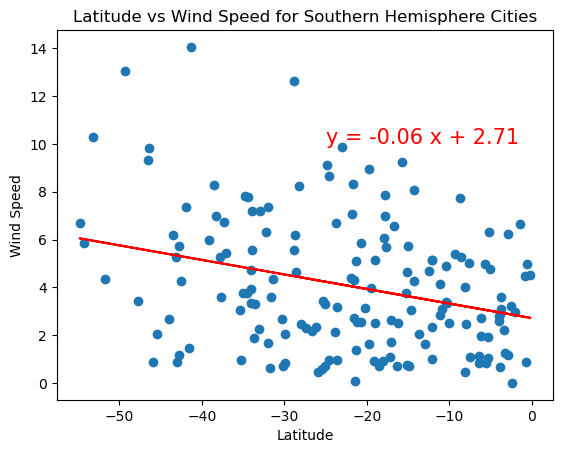

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"] 
y_label = "Wind Speed"
title = "Latitude vs Wind Speed for Southern Hemisphere Cities"
eq_loc=(-25,10)
linreg_plot(x,y,title,y_label, eq_loc)

**Discussion about the linear relationship:** There appears to be no correlation with Latitude and Wind Speed in the cities reviewed. Both the correlation co-efficient and r-values do not support a relationship.